#Data Preprocessing.
Will include:


1.   Missing values detection and correction.
2.   Outliers detection and correction.

Melbourne Housing Snapshot data has been used from [Kaggle](https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot).

In [14]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/harshitsahush/machine_learning_datasets/main/melbourne_housing_snapshot_kaggle.csv")
print(df)

              Suburb           Address  Rooms Type      Price Method  \
0         Abbotsford      85 Turner St      2    h  1480000.0      S   
1         Abbotsford   25 Bloomburg St      2    h  1035000.0      S   
2         Abbotsford      5 Charles St      3    h  1465000.0     SP   
3         Abbotsford  40 Federation La      3    h   850000.0     PI   
4         Abbotsford       55a Park St      4    h  1600000.0     VB   
...              ...               ...    ...  ...        ...    ...   
13575  Wheelers Hill      12 Strada Cr      4    h  1245000.0      S   
13576   Williamstown     77 Merrett Dr      3    h  1031000.0     SP   
13577   Williamstown       83 Power St      3    h  1170000.0      S   
13578   Williamstown      96 Verdon St      4    h  2500000.0     PI   
13579     Yarraville        6 Agnes St      4    h  1285000.0     SP   

        SellerG        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  \
0        Biggin   3/12/2016       2.5    3067.0  ...  

#Missing data

##Detection

In [15]:
print(df.isna().sum())

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64


##Correction

###Categorical data

Car, CouncilArea, YearBuilt are categorical.

####Method 1:Drop the values.
Since 'Car' == 62 missing, simply drop rows where  None.

In [16]:
df_subset = df[df["Car"].isna() == False]
print(df_subset.isna().sum())

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea     6417
YearBuilt        5344
CouncilArea      1307
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64


####Method 2:Fill with new value.
Fill 'CouncilArea' with a new value Unknown.

In [17]:
import numpy as np
df_subset['CouncilArea'].replace({np.nan : 'Absent'}, inplace = True)
print(df_subset.isna().sum())

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea     6417
YearBuilt        5344
CouncilArea         0
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64


<ipython-input-17-d2c92072e2d5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['CouncilArea'].replace({np.nan : 'Absent'}, inplace = True)


####Method 4: Fill with mode(most frequent value)
Fill 'YearBuilt' with the mode.

In [19]:
temp = df_subset['YearBuilt'].mode()[0]
df_subset['YearBuilt'].replace({np.nan : temp}, inplace = True)
print(df_subset.isna().sum())

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea     6417
YearBuilt           0
CouncilArea         0
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64


<ipython-input-19-a4588cdf18d7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['YearBuilt'].replace({np.nan : temp}, inplace = True)


###Non-categorical data

'BuildingArea' is a continuous data here, hence replacing it with mean.

In [21]:
temp = df_subset['BuildingArea'].mean()
df_subset['BuildingArea'].replace({np.nan : temp}, inplace = True)
print(df_subset.isna().sum())

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64


<ipython-input-21-5c38c38f877e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['BuildingArea'].replace({np.nan : temp}, inplace = True)


#Outliers

Easiest method is to draw a histogram, and remove the areas where very less values are present, which might skew the data.

array([[<Axes: title={'center': 'Rooms'}>,
        <Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Distance'}>,
        <Axes: title={'center': 'Postcode'}>],
       [<Axes: title={'center': 'Bedroom2'}>,
        <Axes: title={'center': 'Bathroom'}>,
        <Axes: title={'center': 'Car'}>,
        <Axes: title={'center': 'Landsize'}>],
       [<Axes: title={'center': 'BuildingArea'}>,
        <Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'Lattitude'}>,
        <Axes: title={'center': 'Longtitude'}>],
       [<Axes: title={'center': 'Propertycount'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

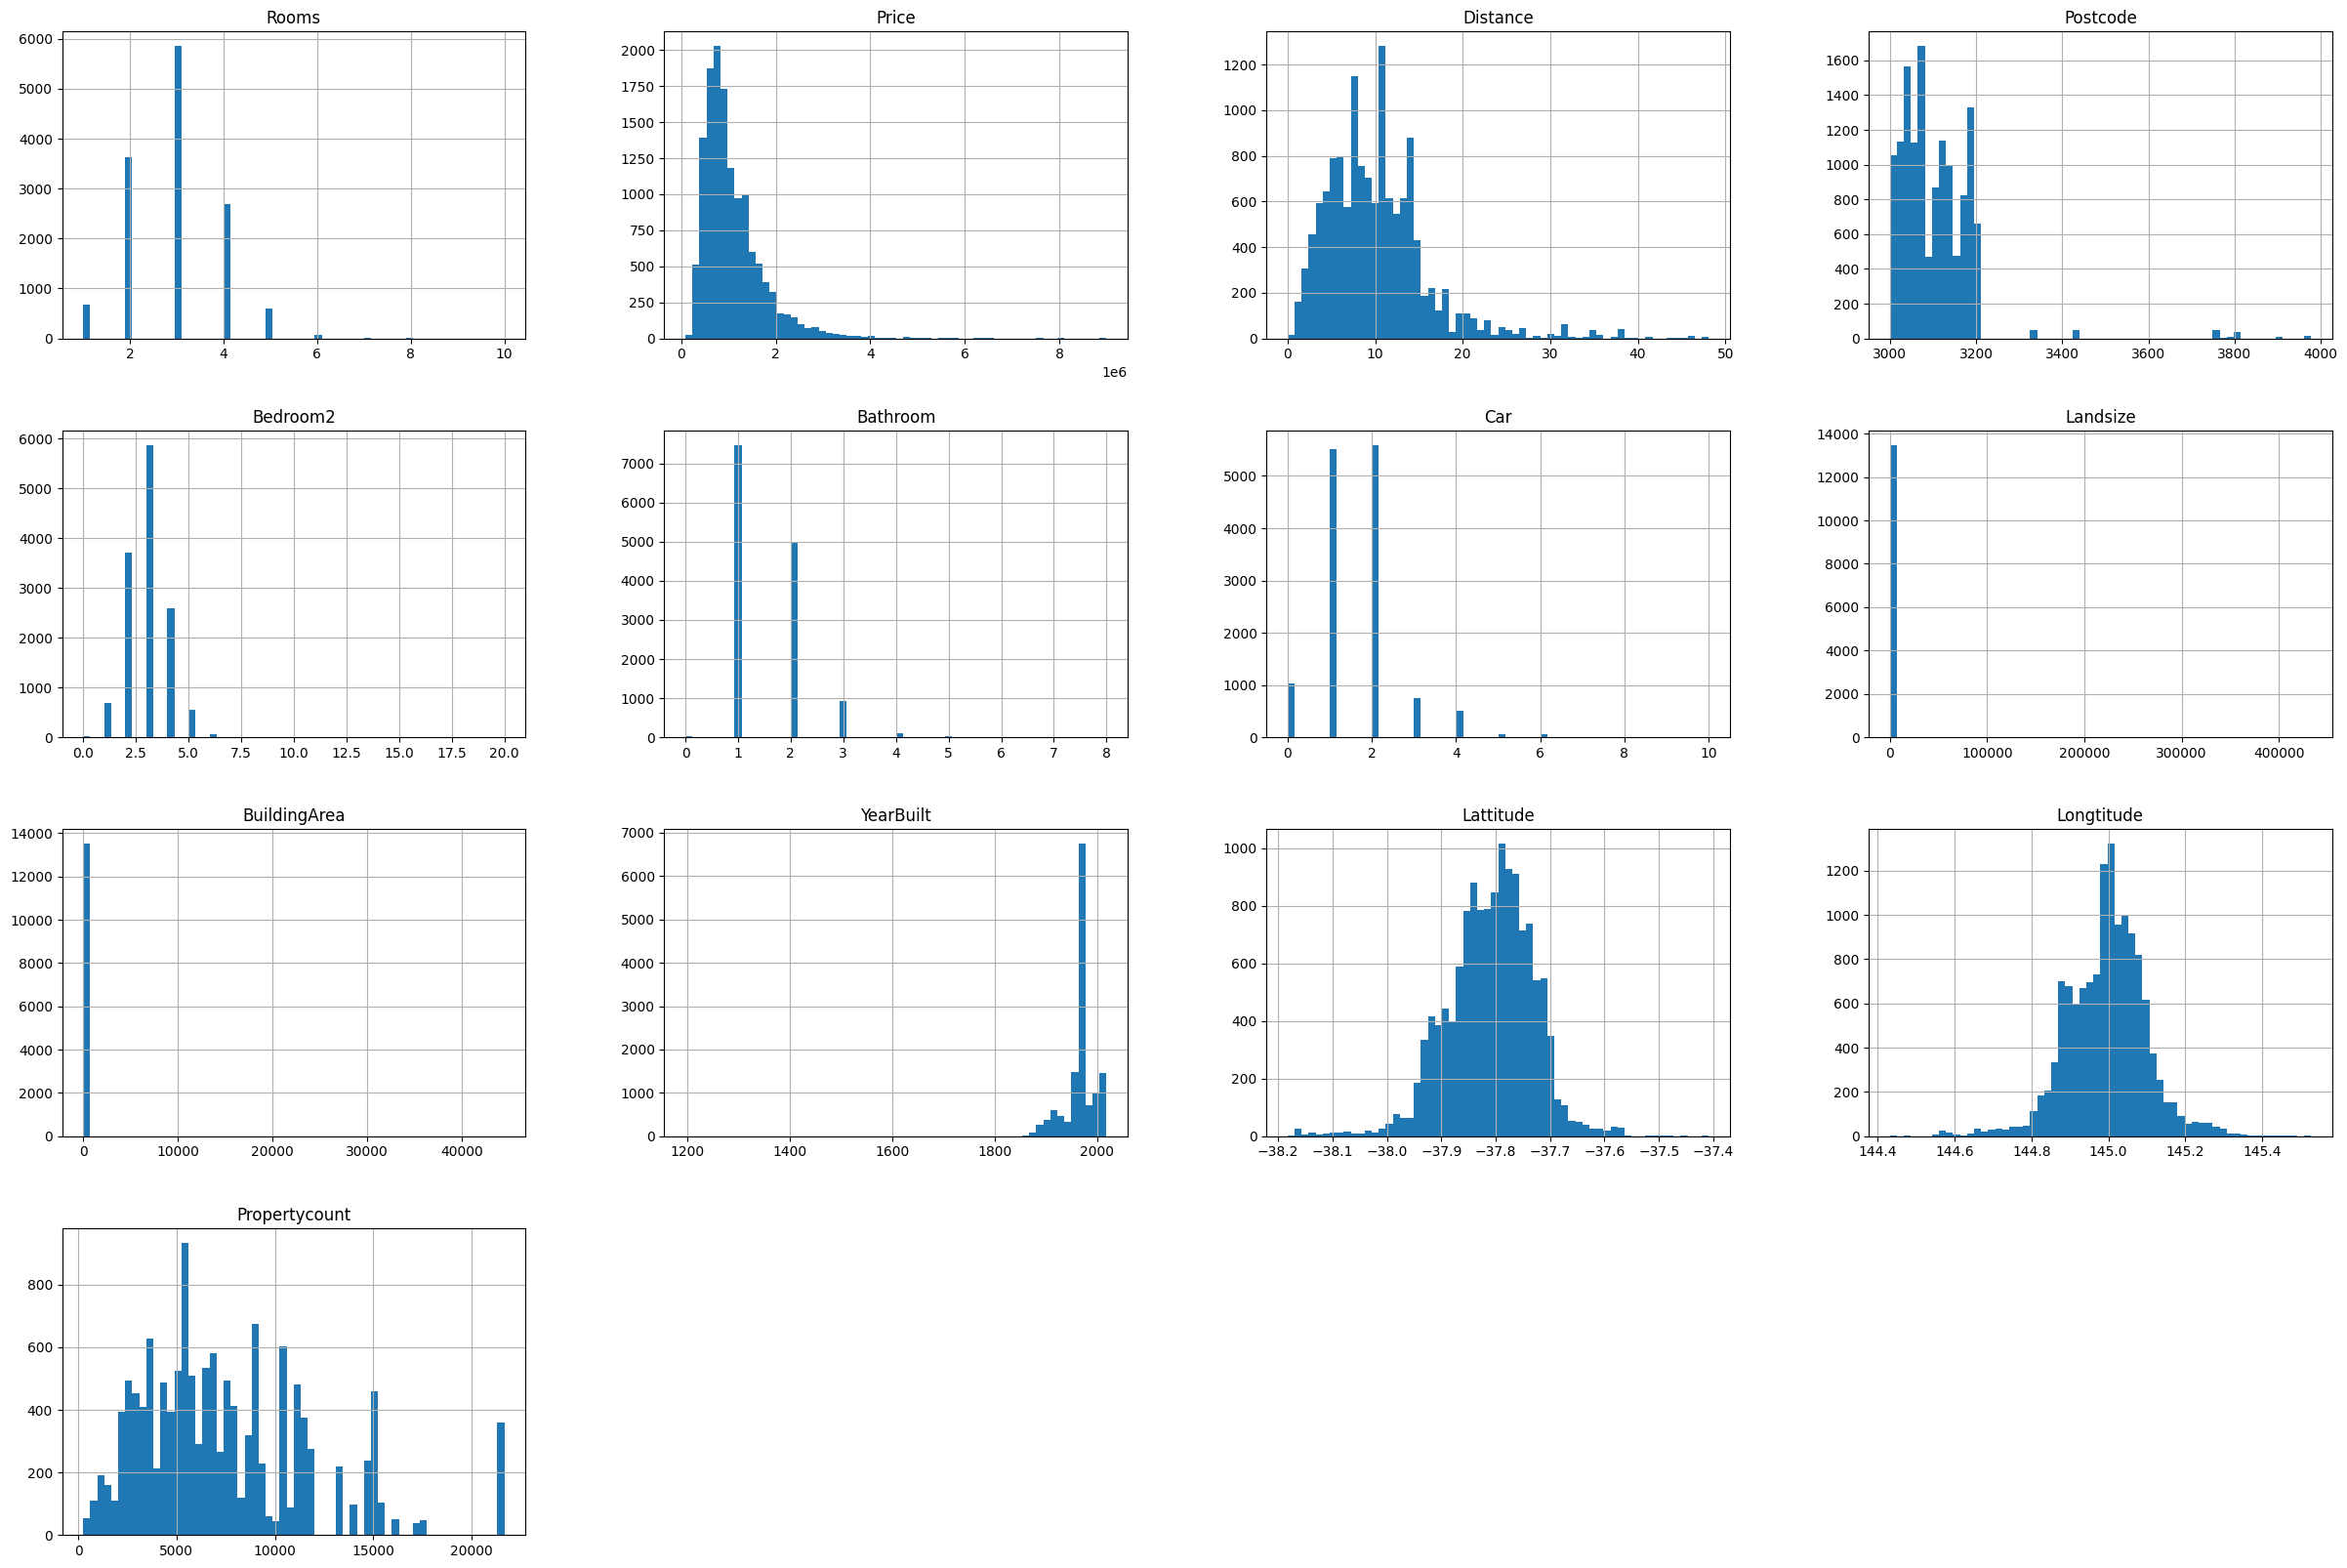

In [24]:
df_subset.hist(bins = 60, figsize = (30, 20))

Assuming lets say "YearBuilt", very little use of considering houses built before 1800, so remove them

In [26]:
df_subset = df_subset[df_subset["YearBuilt"] > 1800]

array([[<Axes: title={'center': 'Rooms'}>,
        <Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Distance'}>,
        <Axes: title={'center': 'Postcode'}>],
       [<Axes: title={'center': 'Bedroom2'}>,
        <Axes: title={'center': 'Bathroom'}>,
        <Axes: title={'center': 'Car'}>,
        <Axes: title={'center': 'Landsize'}>],
       [<Axes: title={'center': 'BuildingArea'}>,
        <Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'Lattitude'}>,
        <Axes: title={'center': 'Longtitude'}>],
       [<Axes: title={'center': 'Propertycount'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

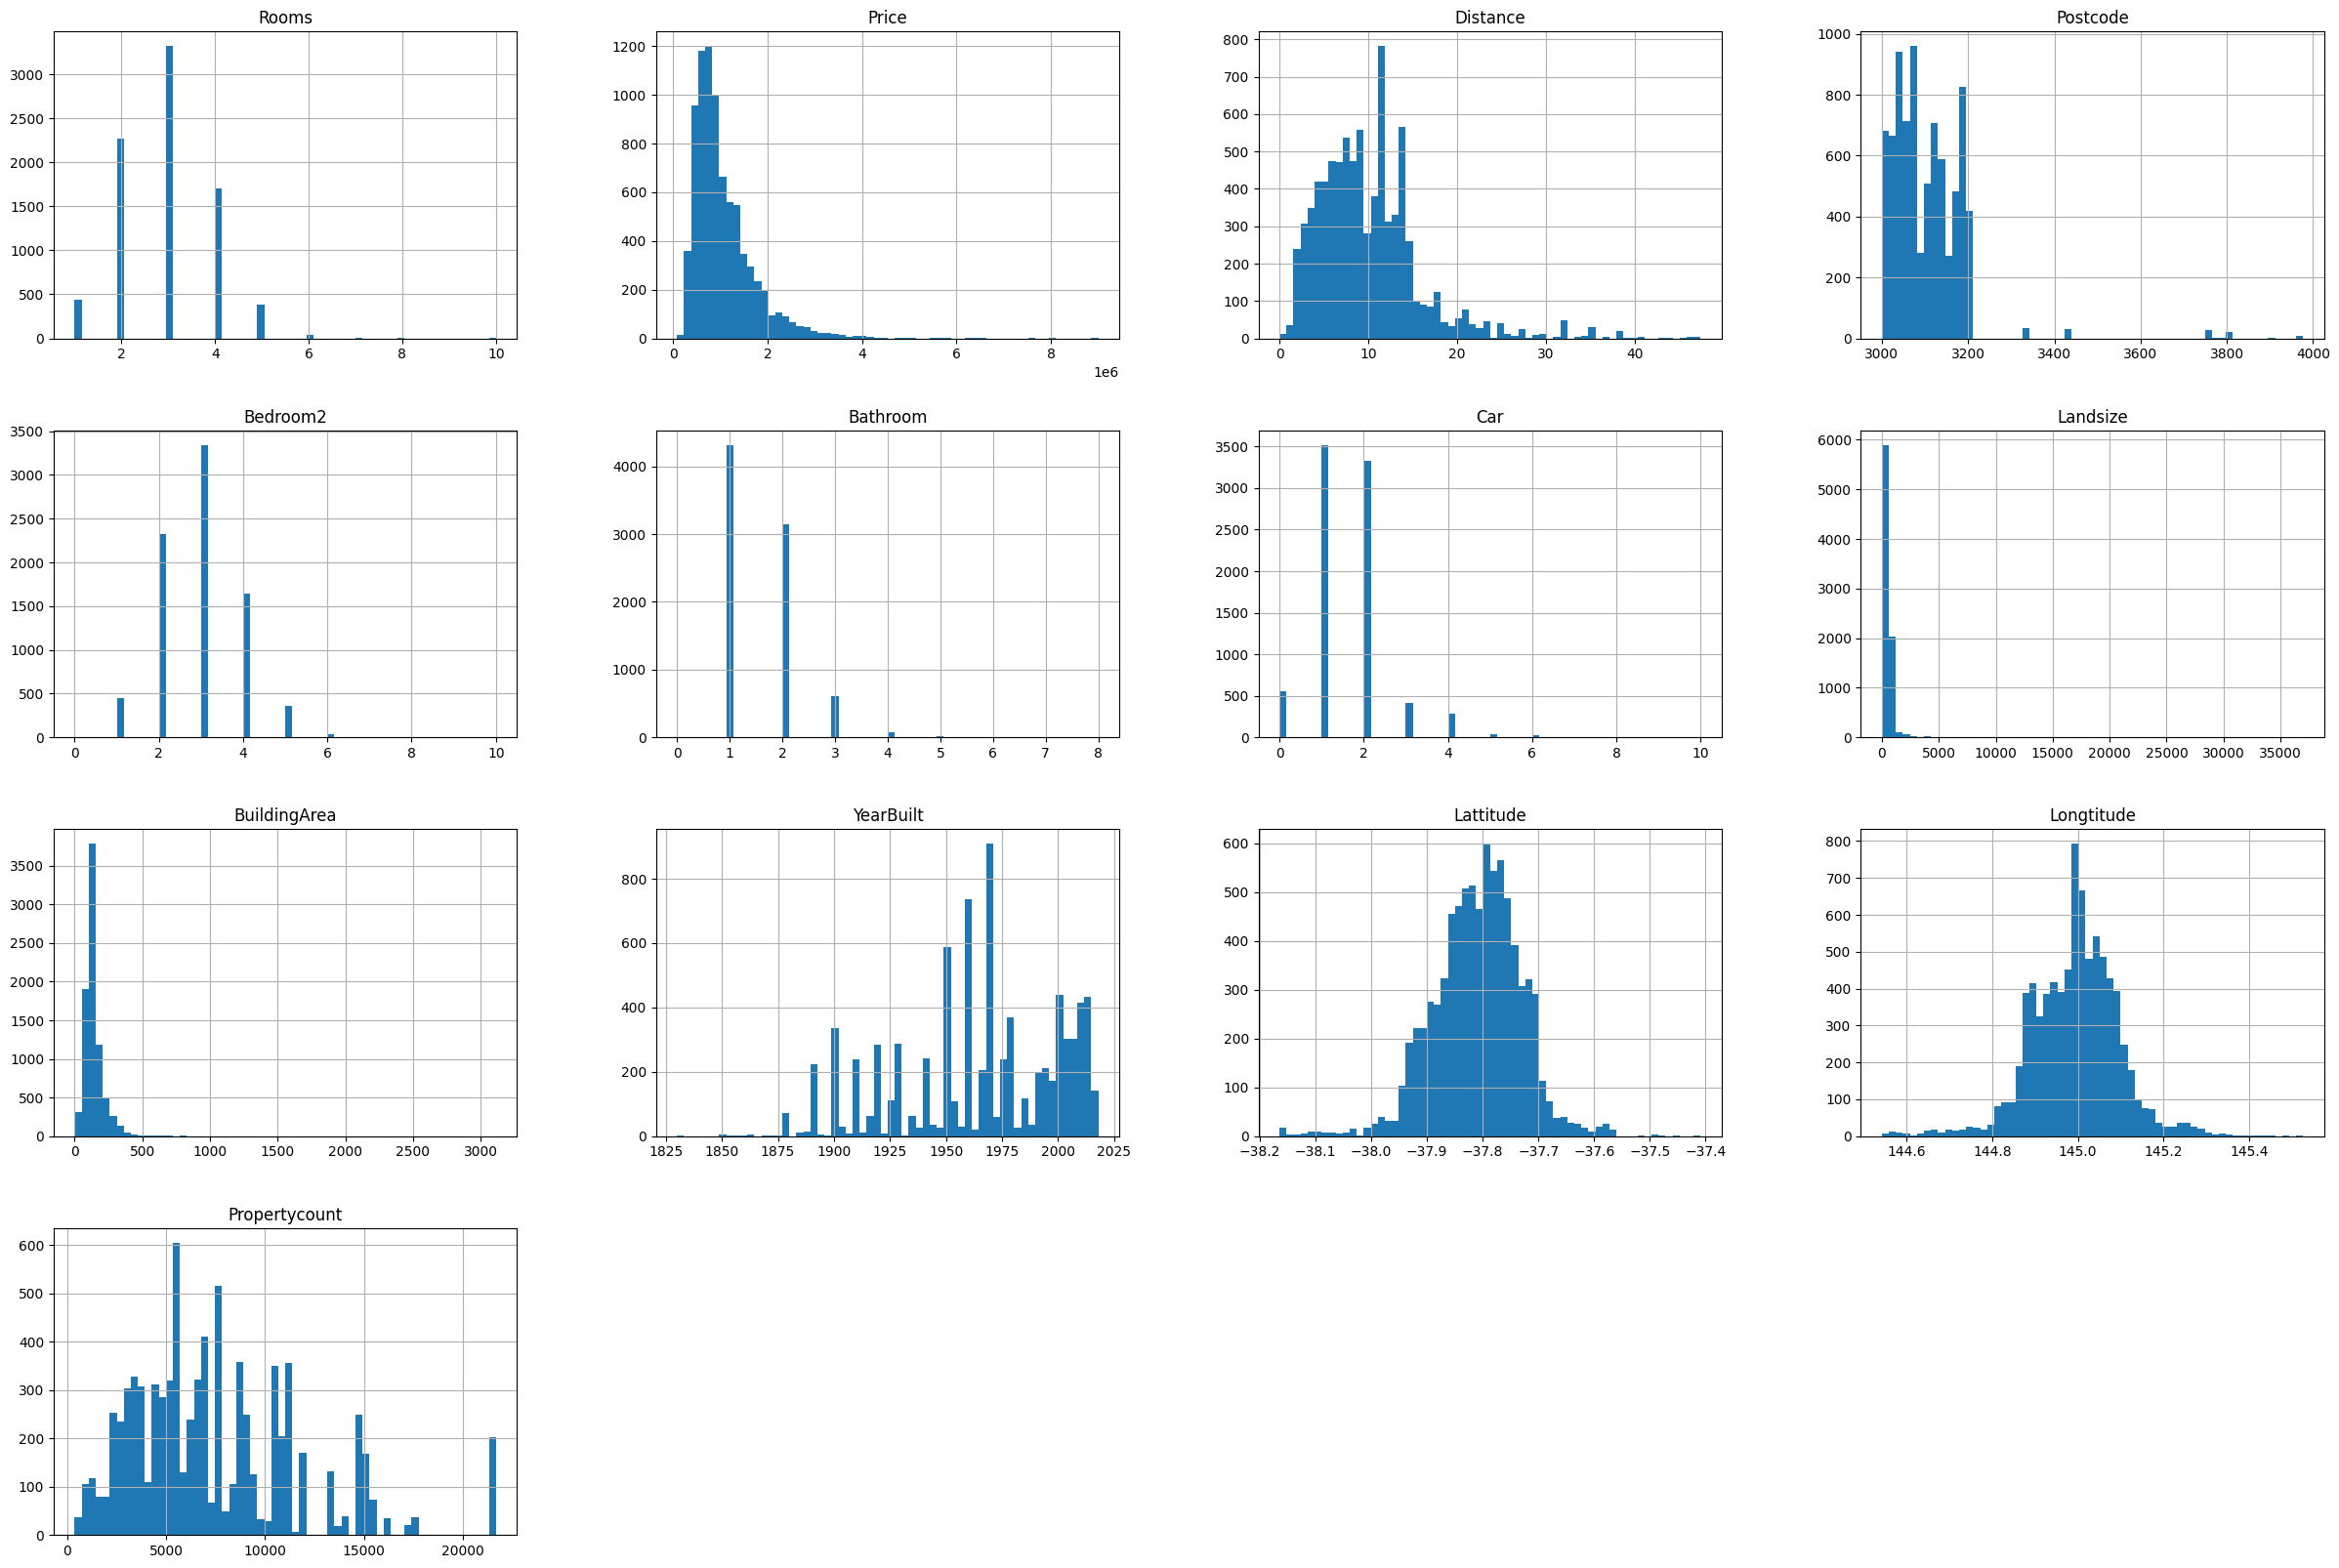

In [27]:
df_subset.hist(bins = 60, figsize = (30, 20))